# Data/libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Kijako/Kijako/main/dataset_diabetes/diabetic_data.csv")
dico_labels = "https://raw.githubusercontent.com/Kijako/Python_S7_Diabete/main/dataset_diabetes/mapping_diabete.py"


# Getting to know the dataset

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
print("josselin")

In [5]:
#Remplace tous les "?" par une cellule "nulle" dans le df
df = df.replace('?', np.NaN)


In [6]:
print("nb colonnes = ", len(df.columns))
print("nb entrees = ", len(df))

nb colonnes =  50
nb entrees =  101766


In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
encounter_id,encounter_id,0.000000
patient_nbr,patient_nbr,0.000000
race,race,2.233555
gender,gender,0.000000
age,age,0.000000
weight,weight,96.858479
admission_type_id,admission_type_id,0.000000
discharge_disposition_id,discharge_disposition_id,0.000000
admission_source_id,admission_source_id,0.000000
time_in_hospital,time_in_hospital,0.000000


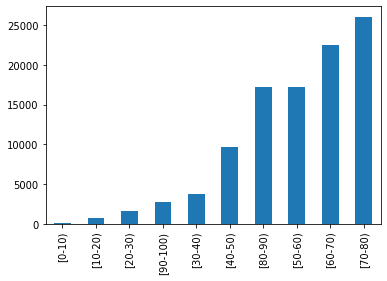

In [8]:
#Histogramme de l'age des admis
df.age.value_counts().plot(kind='bar').invert_xaxis()

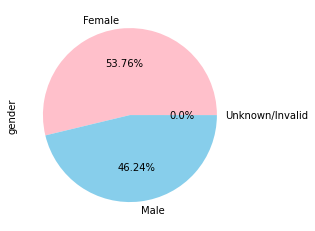

In [9]:
#Histogramme du genre des admis
#df.gender.value_counts().plot(kind='bar')

#OU 
df.gender.value_counts().plot(kind='pie', autopct = lambda x: str(round(x, 2)) + '%',colors = ['pink', 'skyblue'])

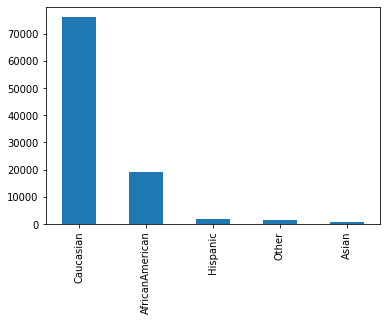

In [10]:
#Histogramme de l'ethnie des admis
df.race.value_counts().plot(kind='bar')

Text(-1, 0, '1 : Emergency \n2 : Urgent \n3 : Elective \n4 : Newborn \n5 : Not Available \n6 : Null \n7 : Trauma Center \n8 : Not mapped')

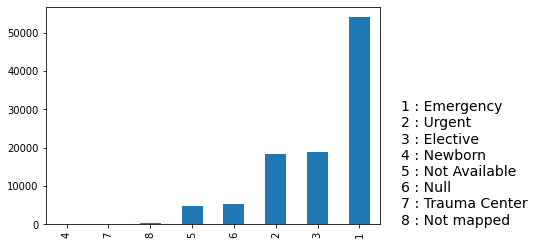

In [11]:
#Raison d'admission 
df.admission_type_id.value_counts().plot(kind='bar').invert_xaxis()
plt.text(x =-1,y=0,s ="1 : Emergency \n2 : Urgent \n3 : Elective \n4 : Newborn \n5 : Not Available \n6 : Null \n7 : Trauma Center \n8 : Not mapped",
     fontsize=14, color='black')


In [12]:
df1 = df['patient_nbr'].value_counts()
print("There is",len(df1), 'different patient')
#Faut aller plus lon dans l'analyse


There is 71518 different patient


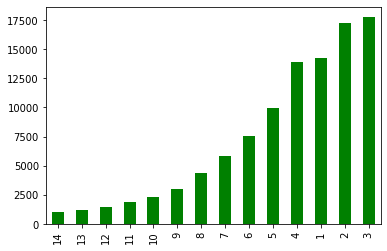

In [13]:
#Time in hospital
df.time_in_hospital.value_counts().plot(kind='bar', color='green').invert_xaxis()

In [14]:
df['medical_specialty'].value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Neurophysiology                         1
Dermatology                             1
Pediatrics-InfectiousDiseases           1
Psychiatry-Addictive                    1
Surgery-PlasticwithinHeadandNeck        1
Name: medical_specialty, Length: 72, dtype: int64

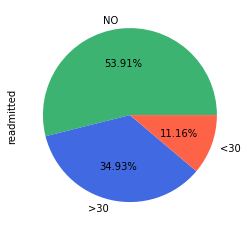

In [15]:
df.readmitted.value_counts().plot(kind='pie', autopct = lambda x: str(round(x, 2)) + '%',colors = ['mediumseagreen', 'royalblue', 'tomato'])